<a href="http://lnls.cnpem.br/"><img src="http://fig.if.usp.br/~biofisic/images/logo_lnls.jpg" style="width:90px; float: left;"></a><h1> Linearity Power Supply Checking </h1>

----

> This section is intend for stability check of the Power Supply 225 A for a given time interval.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
plt.style.use('bmh')
import numpy as np
import pandas as pd
import datetime
import time

%matplotlib inline

In [ ]:
### Opening data file
with open ('C:/Users/lucas.balthazar.ABTLUS/Desktop/Multicanal_prog_(30_01)/Monitoring_save_data 30-8-2017.dat') as arq:
    data = arq.read().splitlines()
    
data[:10]

In [ ]:
arq.close()

In [2]:
col = pd.read_table('C:/Users/lucas.balthazar.ABTLUS/Desktop/Multicanal_prog_(30_01)/Monitoring_save_data 30-8-2017.dat')

In [3]:
col.head()

,DateTime,Unnamed: 1,Volt(V),Unnamed: 3,Current(A)
0,30/08/2017 16:05:47,4.875040,156.001277,NaN,NaN
1,30/08/2017 16:05:58,4.875039,156.001235,NaN,NaN
2,30/08/2017 16:06:09,4.875037,156.001194,NaN,NaN
3,30/08/2017 16:06:20,4.875041,156.001318,NaN,NaN
4,30/08/2017 16:06:31,4.875044,156.001402,NaN,NaN


In [4]:
del col['Current(A)']
del col['Unnamed: 3']

In [5]:
col.columns = ['DateTime', 'Volt(V)', 'Current(A)']
col.head()

,DateTime,Volt(V),Current(A)
0,30/08/2017 16:05:47,4.875040,156.001277
1,30/08/2017 16:05:58,4.875039,156.001235
2,30/08/2017 16:06:09,4.875037,156.001194
3,30/08/2017 16:06:20,4.875041,156.001318
4,30/08/2017 16:06:31,4.875044,156.001402


In [ ]:
col.describe()

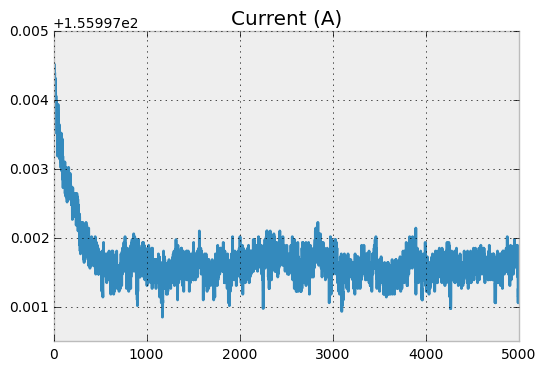

In [8]:
col['Current(A)'].plot(kind='line', title='Current (A)')

In [ ]:
data_ = list(col['DateTime'][1][:10])
for j in data_:
    if j == "/": data_.remove("/")
#data_ = (list(map(int, data_)))
dia = int(data_[0]+data_[1])
mes = int(data_[2]+data_[3])
ano = int(data_[6]+data_[7])

In [ ]:
sequence = list(col['DateTime'][1][11:])
for i in sequence:
    if i == ':': sequence.remove(':')
#sequence = (list(map(int, sequence)))
hora = int(sequence[0]+sequence[1])
minu = int(sequence[2]+sequence[3])
seg = int(sequence[4]+sequence[5])
geral = (dia, mes, ano, hora, minu, seg, 0, 0, 0)

In [ ]:
mydate = datetime.date(1943,3, 13)  #year, month, day
print(mydate.strftime("%A"))


In [ ]:
mutime = datetime.time(hora, minu, seg, 0)
print(mutime.hour)
print(mutime.minute)
print(mutime.second)

In [9]:
horas = np.array([])
for i in range(len(col['DateTime'])):
    HHora = col['DateTime'][i][11:]
    (h, m, s) = HHora.split(':')
    result = int(h) * 3600 + int(m) * 60 + int(s)
    horas = np.append(horas, result)
horas[:10]

array([ 57947.,  57958.,  57969.,  57980.,  57991.,  58002.,  58013.,
        58024.,  58035.,  58046.])

In [14]:
### Finding the change of day 30-31/08
horas_2 = np.array([])
for i in range(len(col['DateTime'])):
    horas_2=np.append(horas_2,col['DateTime'][i][11:])
np.where(horas_2=='23:59:55')[0]

array([2580], dtype=int64)

In [15]:
horas_2[2580]

'23:59:55'

In [ ]:
ai = datetime.timedelta(seconds=57947)
ai

In [ ]:
#tmp = time.localtime()
_datetime = time.strftime('%H:%M:%S', geral)
_datetime


In [ ]:
x = [datetime.datetime.now()]
x

In [16]:
x1 = [datetime.datetime(2017,8,30,0,0,0,0) + datetime.timedelta(seconds=horas[i]) for i in range(2581)]
x2 = [datetime.datetime(2017,8,31,0,0,0,0) + datetime.timedelta(seconds=horas[i]) for i in range(2581,5000)]
x_t = x1+x2

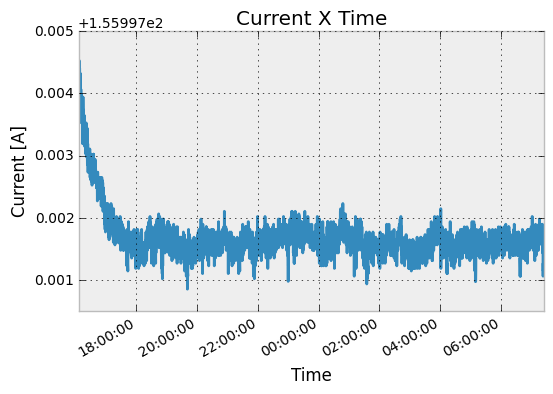

In [21]:
#from matplotlib.dates import DateFormatter
#formatter = DateFormatter('%H:%M:%S')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.plot(x_t,col['Current(A)'], '-', label='Current[A]')
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.title('Current X Time')

plt.gcf().autofmt_xdate()

### Manipulating data for Dataframe

In [23]:
### Duplicate Dataframe
col_2 = col

In [24]:
### Setting datetime as index
col_2.set_index(['DateTime'], inplace=True)

In [25]:
col_2.head()

,Volt(V),Current(A)
DateTime,,
30/08/2017 16:05:47,4.875040,156.001277
30/08/2017 16:05:58,4.875039,156.001235
30/08/2017 16:06:09,4.875037,156.001194
30/08/2017 16:06:20,4.875041,156.001318
30/08/2017 16:06:31,4.875044,156.001402


c:\python34\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """


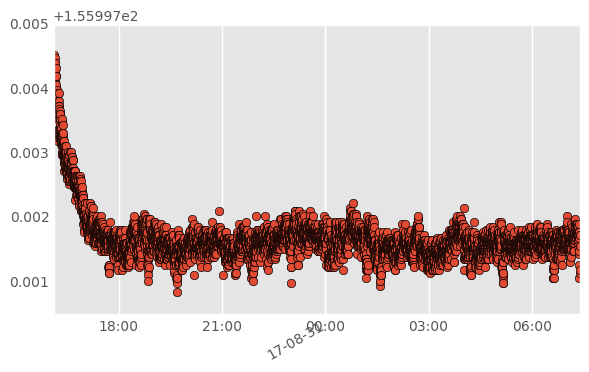

In [58]:
import matplotlib.dates as dates
import datetime as dt
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot_date(col_2.index.to_datetime(), col_2['Current(A)'])
ax.xaxis.set_minor_locator(dates.HourLocator(byhour=range(0, 25, 3)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))
plt.tight_layout()  #ajusta layout
fig.autofmt_xdate()
plt.show()

In [59]:
col.describe()

,Volt(V),Current(A)
count,5000.000000,5000.000000
mean,4.874959,155.998682
std,0.000012,0.000388
min,4.874933,155.997853
25%,4.874952,155.998477
50%,4.874956,155.998605
75%,4.874962,155.998771
max,4.875048,156.001526
